1. Import dependencies

In [109]:
import tensorflow
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.utils import shuffle
from keras.utils import np_utils
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator



2.   Load data



In [2]:
def load_data(dataset):
    cifar10 = keras.datasets.cifar10
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    
    return x_train, y_train, x_test, y_test

In [3]:
x_train, y_train, x_test, y_test = load_data(cifar10)
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Class Labels: ',np.unique(y_train))

170508288/170498071 [==============================] - 3s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Class Labels:  [0 1 2 3 4 5 6 7 8 9]


3. Plot a few images 

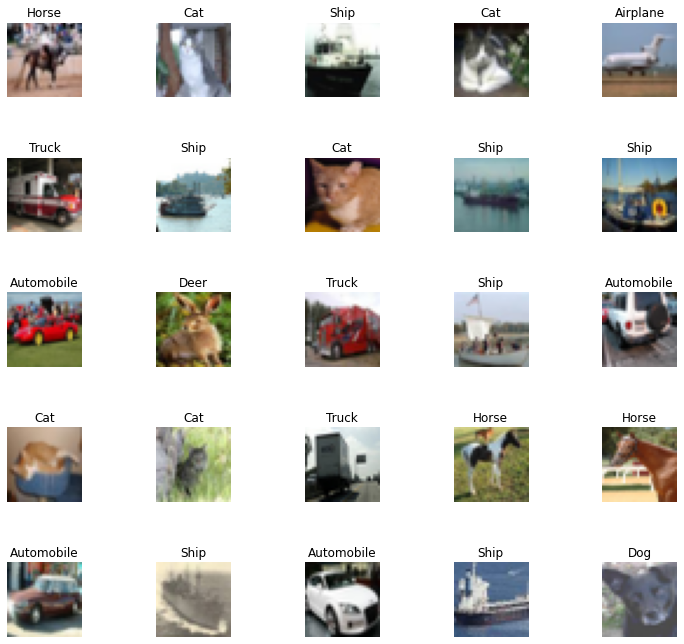

In [4]:
def showImages(num_row,num_col,X,Y):

    (X_rand, Y_rand) = shuffle(X, Y)
    
    fig, axes = plt.subplots(num_row,num_col,figsize = (12,12))
    axes = axes.ravel()
    for i in range(0, num_row*num_col):
        axes[i].imshow(X_rand[i])
        axes[i].set_title("{}".format(labels[Y_rand.item(i)]))
        axes[i].axis('off')
        plt.subplots_adjust(wspace =1)
        
    return


labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

num_row = 5
num_col = 5
showImages(num_row,num_col,X =x_train,Y = y_train)


4. Normalize input

In [5]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

#normalization from [0:255] to [0:1] // scale the data to lie between 0 to 1
x_train /= 255
x_test /= 255

#convert labels to one_hot vectors
y_train=np_utils.to_categorical(y_train) 
y_test=np_utils.to_categorical(y_test) 


5. Define your model

In [94]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same', input_shape = (32,32,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

6. Model summary

In [95]:
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_10 (Bat  (None, 16, 16, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_43 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                      

7. Compile your model

In [96]:
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])


8. Checkpoint

In [97]:
# Write a checkpoint which stops the training process when the val accuracy doesn't change for 5 epochs

callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)


9. Fit your model

In [98]:
history =model.fit(x_train,y_train,epochs=10,validation_split=0.3,callbacks=[callback])

Epoch 1/10
1094/1094 [==============================] - 192s 174ms/step - loss: 1.6198 - accuracy: 0.4165 - val_loss: 1.3070 - val_accuracy: 0.5553
Epoch 2/10
1094/1094 [==============================] - 195s 178ms/step - loss: 1.1867 - accuracy: 0.5914 - val_loss: 1.2611 - val_accuracy: 0.5640
Epoch 3/10
1094/1094 [==============================] - 188s 172ms/step - loss: 0.9791 - accuracy: 0.6728 - val_loss: 1.3921 - val_accuracy: 0.5414
Epoch 4/10
1094/1094 [==============================] - 187s 171ms/step - loss: 0.8367 - accuracy: 0.7253 - val_loss: 0.9240 - val_accuracy: 0.6937
Epoch 5/10
1094/1094 [==============================] - 190s 174ms/step - loss: 0.7142 - accuracy: 0.7692 - val_loss: 0.8270 - val_accuracy: 0.7233
Epoch 6/10
1094/1094 [==============================] - 189s 173ms/step - loss: 0.6153 - accuracy: 0.7995 - val_loss: 0.8969 - val_accuracy: 0.7135
Epoch 7/10
1094/1094 [==============================] - 187s 171ms/step - loss: 0.5299 - accuracy: 0.8271 - val_

10. Plot accuracy per epoch

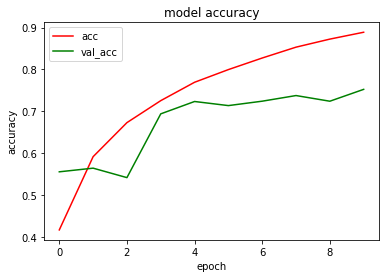

In [99]:
# Plot accuracy per iteration
plt.plot(history.history['accuracy'], label='acc', color='red')
plt.plot(history.history['val_accuracy'], label='val_acc', color='green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

11. Data augmentation

In [112]:
batch_size = 32
epochs = 10

# create a copy of your model and train it with augmented data
model2 = tensorflow.keras.models.clone_model(model)

model2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Define transformations for train data
datagen = ImageDataGenerator(
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1, 
        horizontal_flip=True,  
        vertical_flip=False) 

# Fit the model on the batches generated by datagen.flow().
history2 = model2.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                      steps_per_epoch=int(np.ceil(x_train.shape[0] / float(batch_size))),
                      epochs=epochs,
                      validation_data=(x_test, y_test),
                      workers=4
           )

model2.evaluate(x_test, y_test)

Epoch 1/10
1563/1563 [==============================] - 283s 180ms/step - loss: 1.5962 - accuracy: 0.4282 - val_loss: 1.3441 - val_accuracy: 0.5133
Epoch 2/10
1563/1563 [==============================] - 280s 179ms/step - loss: 1.2031 - accuracy: 0.5900 - val_loss: 1.1069 - val_accuracy: 0.6183
Epoch 3/10
1563/1563 [==============================] - 282s 181ms/step - loss: 1.0319 - accuracy: 0.6572 - val_loss: 0.8755 - val_accuracy: 0.7003
Epoch 4/10
1563/1563 [==============================] - 279s 178ms/step - loss: 0.9281 - accuracy: 0.6943 - val_loss: 0.7543 - val_accuracy: 0.7434
Epoch 5/10
1563/1563 [==============================] - 277s 177ms/step - loss: 0.8581 - accuracy: 0.7189 - val_loss: 0.9221 - val_accuracy: 0.6896
Epoch 6/10
1563/1563 [==============================] - 278s 178ms/step - loss: 0.8159 - accuracy: 0.7351 - val_loss: 0.9155 - val_accuracy: 0.6928
Epoch 7/10
1563/1563 [==============================] - 279s 178ms/step - loss: 0.7661 - accuracy: 0.7518 - val_

[0.656436562538147, 0.7825000286102295]

12. Plot accuracy per epoch

Text(0.5, 1.0, 'Accuracy Curves')

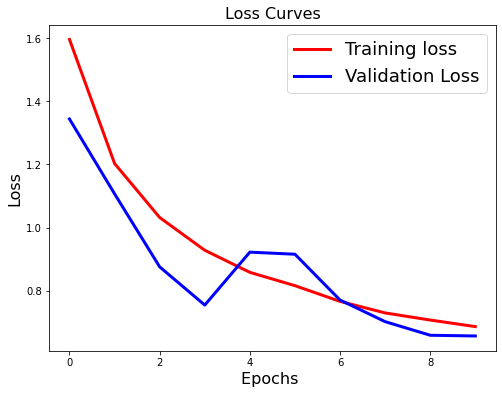

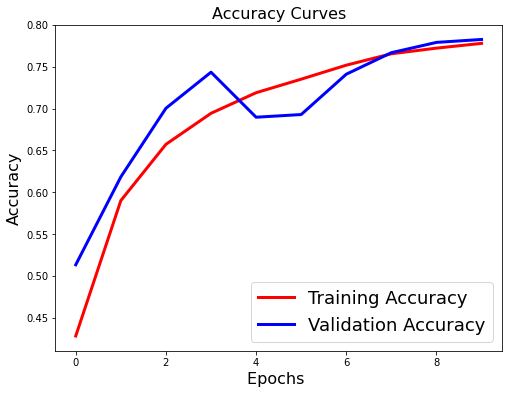

In [114]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history2.history['loss'],'r',linewidth=3.0)
plt.plot(history2.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history2.history['accuracy'],'r',linewidth=3.0)
plt.plot(history2.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

13. Save model

In [100]:
model.save('/content/model.h5')

14. Predict results

In [101]:
pred =model.predict(
    x_test,
    callbacks=[callback])



In [102]:
#evaluation the trained model
[test_loss, test_acc]= model.evaluate(x_test, y_test)
print('test loss=',test_loss)
print('test accuracy=', test_acc)


313/313 [==============================] - 11s 34ms/step - loss: 0.8933 - accuracy: 0.7527
test loss= 0.8933243155479431
test accuracy= 0.7526999711990356


15. Plot images with actual vs predicted labels

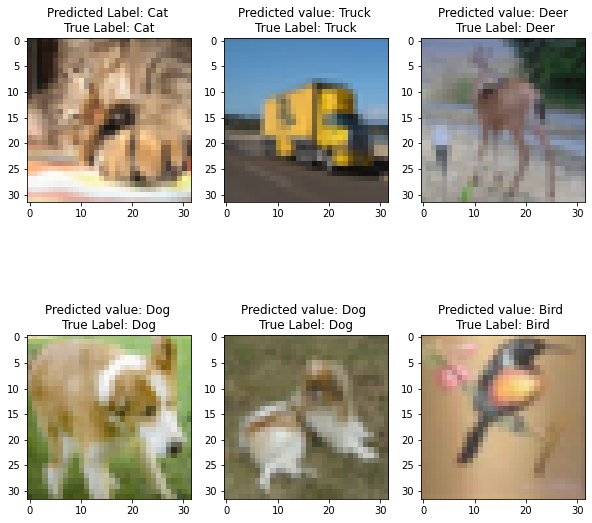

In [115]:
plt.figure(figsize=[10,10])

plt.subplot(2,3,1)
n = 4765
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted Label: " + labels[np.argmax(pred[n], axis=0)] + " \nTrue Label: "+labels[np.argmax(y_test[n], axis=0)])
plt.grid(False)

plt.subplot(2,3,2)
n = 4569
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(labels[np.argmax(pred[n], axis=0)]) + " \nTrue Label: "+labels[np.argmax(y_test[n], axis=0)])
plt.grid(False)

plt.subplot(2,3,3)
n = 100
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(labels[np.argmax(pred[n], axis=0)]) + "\n True Label: "+labels[np.argmax(y_test[n], axis=0)])
plt.grid(False)

plt.subplot(2,3,4)
n = 1698
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(labels[np.argmax(pred[n], axis=0)]) + " \nTrue Label: "+labels[np.argmax(y_test[n], axis=0)])
plt.grid(False)

plt.subplot(2,3,5)
n = 4699
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(labels[np.argmax(pred[n], axis=0)]) + " \nTrue Label: "+labels[np.argmax(y_test[n], axis=0)])
plt.grid(False)

plt.subplot(2,3,6)
n = 9874
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(labels[np.argmax(pred[n], axis=0)]) + " \nTrue Label: "+labels[np.argmax(y_test[n], axis=0)])
plt.grid(False)
        

plt.show()